<h2>Data exploration</h2>

In [ ]:
# Importing all the required packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn

from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

%matplotlib inline

<p>Let's start by importing the available data and looking at the first few rows:</p>

In [ ]:
# Importing the data (in csv)

data_rnec = pd.read_csv('drive/My Drive/DSFA/Project/Copia de main_pqrs (1).csv')
data_rnec['fec_recep']= pd.to_datetime(data_rnec['fec_recep'])
data_rnec.head(5)

,fec_recep,id_admin_uni,anot_pqrs,asunto,id_del_dep,cod_del_dep,fuente_gral,municipio,act_rad_int,id_dep_trasl_direcc,id_estado_pqrs,fec_defin_cierre,id_medio,id_canal_atenc,id_nivel,id_oport_cierre,id_oport_tratam,cod_iso3,sexo,id_tip_solicit,Id_unico,id_tipo_id
0,2019-10-01,2.0,sin informacion,Q. -Por atención irrespetuosa del servidor púb...,91.0,1.0,Rama Judicial - NotificaciÃ³n Judicial,No,Se dio respuesta,sin informacion,3.0,15/01/2019,1.0,1.0,1.0,1.0,2.0,-99,No reporta,4.0,17.0,8
1,2019-01-22,2.0,sin informacion,Q. -Por atención irrespetuosa del servidor púb...,91.0,1.0,GobernaciÃ³n,No,Se dio respuesta,sin informacion,3.0,11/01/2019,6.0,2.0,1.0,1.0,2.0,-99,No reporta,4.0,18.0,8
2,2019-01-23,2.0,sin informacion,P. - I.D. - R.C. - Expedición de copias.,91.0,1.0,Peticionario - Colombiano,No,Se dio respuesta,sin informacion,3.0,09/01/2019,6.0,2.0,1.0,1.0,2.0,-99,No reporta,4.0,19.0,1
3,2019-01-25,2.0,sin informacion,P. - E.L. - Jurados de votación .,91.0,1.0,Otras entidades pÃºblicas,No,Se dio respuesta,sin informacion,3.0,09/01/2019,1.0,1.0,1.0,1.0,2.0,-99,No reporta,4.0,20.0,8
4,2019-01-25,2.0,sin informacion,P. - I.D. - C.C. - Otros.,91.0,1.0,Otras entidades pÃºblicas,No,Se dio respuesta,sin informacion,3.0,10/01/2019,1.0,1.0,1.0,1.0,2.0,-99,No reporta,4.0,21.0,8



**Se crean las columnas con el mes y el mes a~no**



In [ ]:
data_rnec['month'] = pd.DatetimeIndex(data_rnec['fec_recep']).month
data_rnec['month_year'] = pd.to_datetime(data_rnec['fec_recep']).dt.to_period('M')
data_rnec['fec_recep']= pd.to_datetime(data_rnec['fec_recep'])
data_rnec.set_index('fec_recep')
data_rnec.head(5)

,fec_recep,id_admin_uni,anot_pqrs,asunto,id_del_dep,cod_del_dep,fuente_gral,municipio,act_rad_int,id_dep_trasl_direcc,id_estado_pqrs,fec_defin_cierre,id_medio,id_canal_atenc,id_nivel,id_oport_cierre,id_oport_tratam,cod_iso3,sexo,id_tip_solicit,Id_unico,id_tipo_id,month,month_year
0,2019-10-01,2.0,sin informacion,Q. -Por atención irrespetuosa del servidor púb...,91.0,1.0,Rama Judicial - NotificaciÃ³n Judicial,No,Se dio respuesta,sin informacion,3.0,15/01/2019,1.0,1.0,1.0,1.0,2.0,-99,No reporta,4.0,17.0,8,10,2019-10
1,2019-01-22,2.0,sin informacion,Q. -Por atención irrespetuosa del servidor púb...,91.0,1.0,GobernaciÃ³n,No,Se dio respuesta,sin informacion,3.0,11/01/2019,6.0,2.0,1.0,1.0,2.0,-99,No reporta,4.0,18.0,8,1,2019-01
2,2019-01-23,2.0,sin informacion,P. - I.D. - R.C. - Expedición de copias.,91.0,1.0,Peticionario - Colombiano,No,Se dio respuesta,sin informacion,3.0,09/01/2019,6.0,2.0,1.0,1.0,2.0,-99,No reporta,4.0,19.0,1,1,2019-01
3,2019-01-25,2.0,sin informacion,P. - E.L. - Jurados de votación .,91.0,1.0,Otras entidades pÃºblicas,No,Se dio respuesta,sin informacion,3.0,09/01/2019,1.0,1.0,1.0,1.0,2.0,-99,No reporta,4.0,20.0,8,1,2019-01
4,2019-01-25,2.0,sin informacion,P. - I.D. - C.C. - Otros.,91.0,1.0,Otras entidades pÃºblicas,No,Se dio respuesta,sin informacion,3.0,10/01/2019,1.0,1.0,1.0,1.0,2.0,-99,No reporta,4.0,21.0,8,1,2019-01


**Se eval[uan los casos por mes**

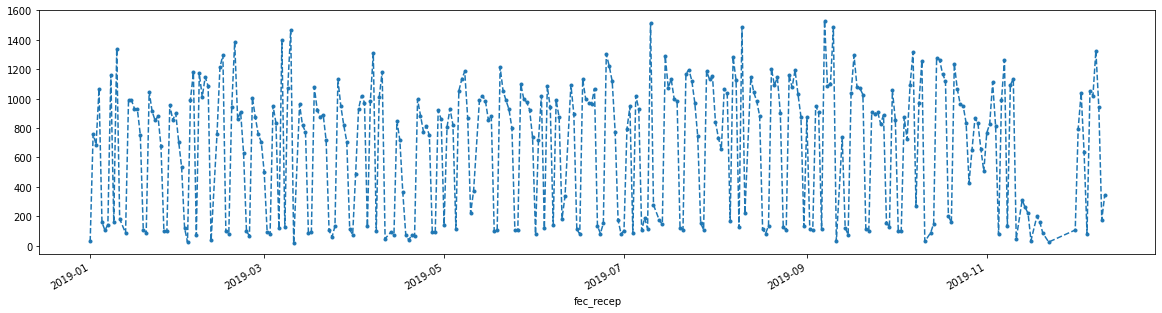

In [ ]:
df_recep = data_rnec.groupby(by = 'fec_recep')['fec_recep'].count()
df_recep.names = ['fec', 'count']
df_recep.plot(style=['.--'], figsize = (20, 5))


**The  daily samples are far too dense for us to make much sense of. We can gain more insight by resampling the data to a coarse grid. Let's resample by week:**

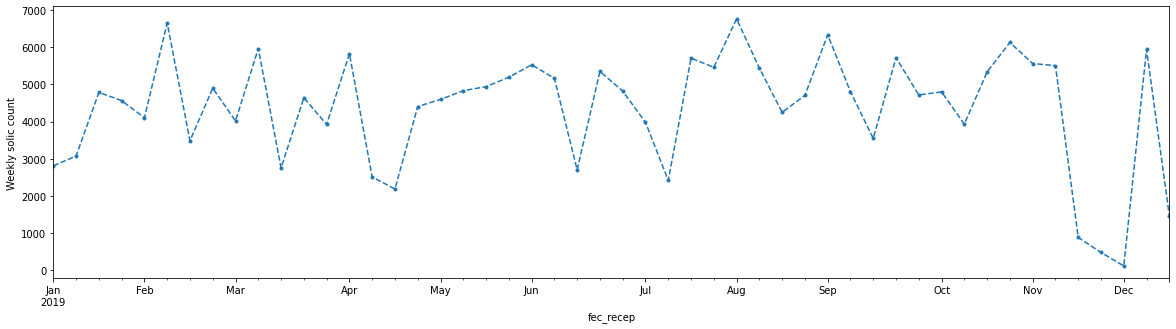

In [ ]:
weekly = df_recep.resample('W').sum()
weekly.plot(style=['.--'], figsize = (20, 5))
plt.ylabel('Weekly solic count');

**This shows us some interesting seasonal trends: unsurprisingly, people file more complaints depending on the week or fortnight of the month, and even within a particular season, the number of complaints varies from week to week.

Another useful way to aggregate the data is to use a moving average, using the pd.rolling_mean () function. Here we will do a 30-day moving average of our data, making sure to center the window:**

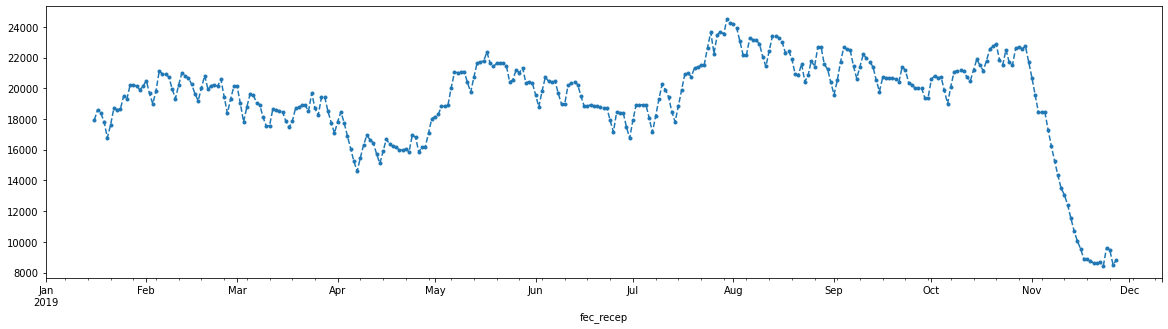

In [ ]:
daily = df_recep.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=['.--'], figsize = (20, 5))


The jaggedness of the result is due to the hard cutoff of the window. We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window. The following code specifies both the width of the window (we chose 90 days) and the width of the Gaussian within the window (we chose 30 days):

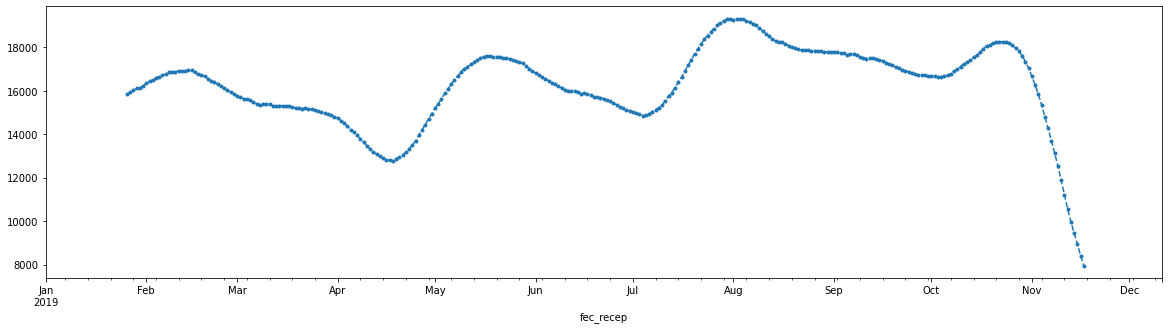

In [ ]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=['.--'], figsize = (20, 5))

## Digging into the data
While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure. For example, we might want to look at the average of requeriments as a function of the day of the week. We can do this using the GroupBy functionality

In [ ]:
by_weekday = df_recep.groupby([df_recep.index.dayofweek, df_recep.id_medio]).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=['.--'], figsize = (20, 5))

AttributeError: ignored

This shows a strong distinction between weekday and weekend totals

With this in mind, let's do a compound GroupBy and look at the daily trend on weekdays and weekends versus the week. We'll start by grouping by both a flag marking the weekend, and the week:

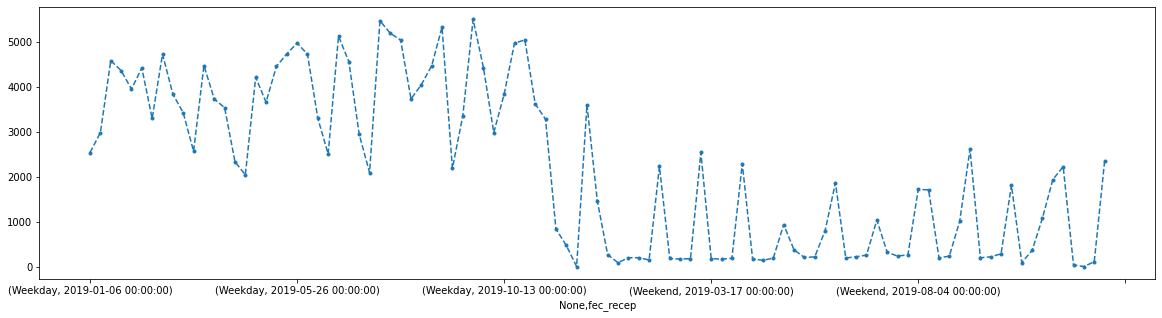

In [ ]:

weekend = np.where(df_recep.index.weekday < 5, 'Weekday', 'Weekend')
by_week = df_recep.groupby([weekend]).resample('W').sum()
by_week.plot(style=['.--'], figsize = (20, 5))

**Answer.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
